Qiskit Basics 1 - Tutorial (IIITK 2021)


In [39]:
import qiskit
from qiskit import*

In [2]:
qiskit.__version__

'0.16.1'

In [58]:
#Run this cell if you are doing this on locally on your PC. Step not necessary if executing in IBM's online jupyter notebook
# To Enable your account on Qiskit, replace 'Paste your API token here' with your newly generated token form https://quantum-computing.ibm.com/
#qiskit.IBMQ.save_account('Paste your API token here')
#qiskit.IBMQ.load_account()

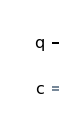

In [21]:
from qiskit import QuantumCircuit

mycircuit = QuantumCircuit(1,1)
mycircuit.draw('mpl')

In [22]:
mycircuit.x(0)
mycircuit.draw()

┌───┐
q_0: ┤ X ├
     └───┘
c: 1/═════

In [23]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_label('0')
sv

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))

In [24]:
new_sv = sv.evolve(mycircuit)
new_sv

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

In [25]:
mycircuit.measure(0,0)
mycircuit.draw()

┌───┐┌─┐
q_0: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [26]:
mycircuit1= QuantumCircuit(1,1)
mycircuit1.h(0)
mycircuit1.draw()

┌───┐
q_0: ┤ H ├
     └───┘
c: 1/═════

In [29]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
sv1=Statevector.from_label('0')
new_sv1=sv.evolve(mycircuit1)
new_sv1

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))

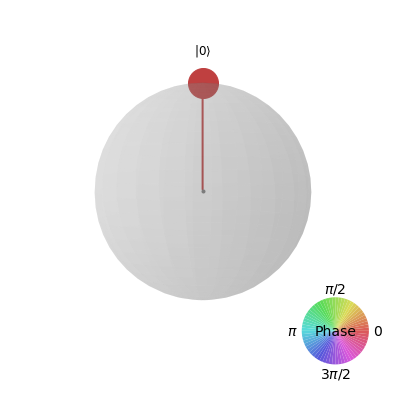

In [30]:
plot_state_qsphere(sv1)

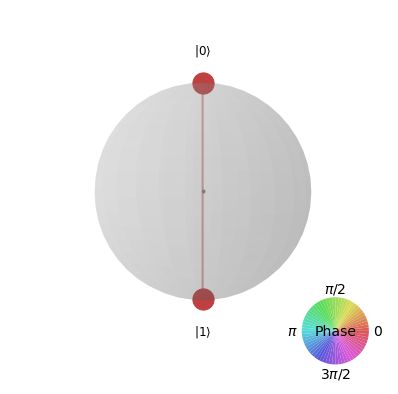

In [31]:
plot_state_qsphere(new_sv1)

In [49]:
mycircuit2=QuantumCircuit(2,2)
mycircuit2.h(0)
mycircuit2.cx(0,1)
mycircuit2.draw()

mycircuit2Meas=QuantumCircuit(2,2)
mycircuit2Meas.measure(0,0)
mycircuit2Meas.measure(1,1)

In [56]:
mycircuit2.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

In [51]:
backend = qiskit.BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(mycircuit2+mycircuit2Meas, backend, shots=1000).result()


In [53]:
counts  = result.get_counts()
print(counts)

{'11': 512, '00': 488}


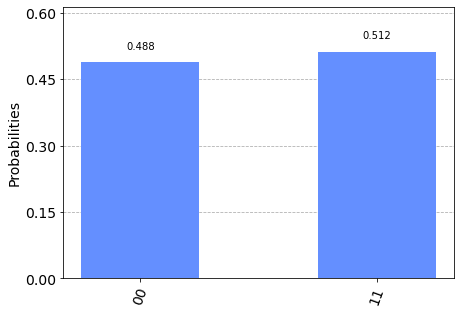

In [55]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

<div style="font-size: 30px">
Task 1 - Create circuits that produce bell states starting from the 00 state. 

</div >

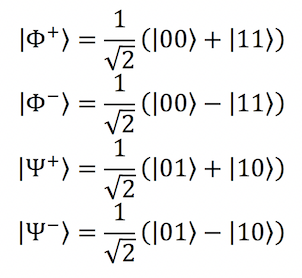

<div style="font-size: 30px">
Quantum Teleportation


We will teleport the quantum state 
$$(\vert0\rangle + \vert1\rangle)/\sqrt{2}$$ from Alice's qubit to Bob's qubit. Recall that the teleportation algorithm consists of four major components:

1. Initializing the state to be teleported. We will do this on Alice's qubit `q0`.
2. Creating entanglement between two qubits. We will use qubits `q1` and `q2` for this. Recall that Alice owns `q1`, and Bob owns `q2`.
3. Applying a Bell measurement on Alice's qubits `q0` and `q1`.
4. Applying classically controlled operations on Bob's qubit `q2` depending on the outcomes of the Bell measurement on Alice's qubits.
    

Quantum Teleportation theory - 
$\\\textbf{Goal}$ Alice wants to send a unknown quantum state to Bob. Say, a state $$\vert\psi\rangle_{s}=(\alpha\vert0\rangle_s + \beta\vert1\rangle_s)$$
$\\\textbf{Pre-requisite}$
Alice and Bob should share an entangled pair of qubits. Say $$\vert\psi\rangle_{AB} = (\vert0\rangle_A\vert0\rangle_B + \vert1\rangle_A\vert1\rangle_B)/\sqrt(2)$$


 $\textbf{Protocol}\\$
Step 1 : Alice does a bell measurement between the unknown state and her part of the qubit that is entangled to Bob's qubit.$$\\$$
 Step 2 : Based on her outcomes Bob does local operations (applies single qubit gates) to his qubit. This changes Bob's qubit's state to that of Alice's unknown state that she wanted to teleport.

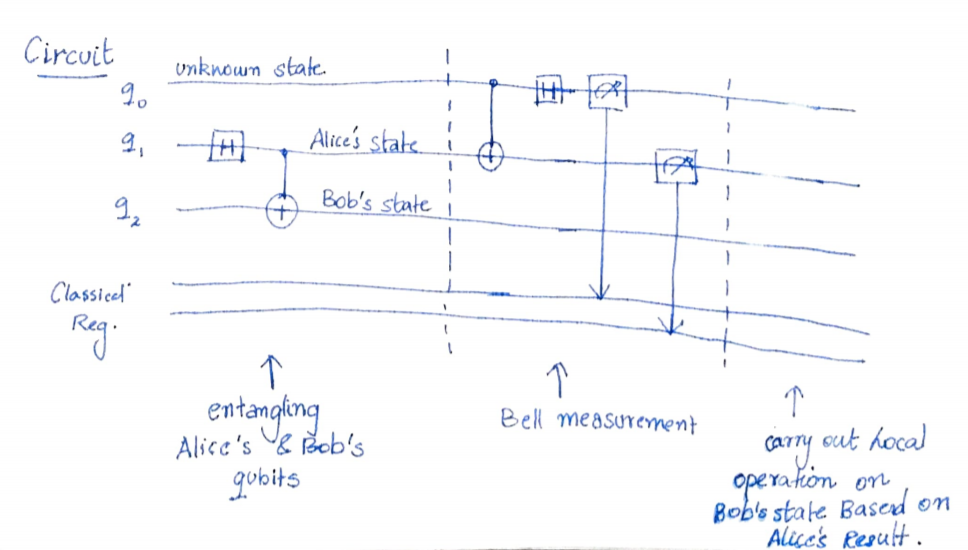